# Практическая работа №1: Алгоритмы эффективного вычисления одночленов
Выполнил студент гр. 1304 Мусаев Артур. Вариант №39.

## Цель работы
Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Рассмотрим методы вычисления одночленов за минимальное число операций, а также приведём некоторые оценки количества операций для вычисления одночленов.<br>
Введём понятия для оценки числа операций:<br>
$\lambda(n) = \lfloor log_{2}(n) \rfloor$ - уменьшенная на 1 длина бинарной записи n<br>
$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$ (число единиц в бинарной записи)

### Бинарный метод SX
Алгоритм бинарного возведения в степень SX:
<ol>
    <li> Запишем число $n$ в бинарном виде:
        $n = (a_m a_{m-1}...a_2 a_1)_2$
    <li> Отбрасываем старший бит:
        $(a_{m-1} a_{m-2}...a_2 a_1)_2$
    <li> Делаем замену по следующему правилу: 
        <center>
            $a_i = 1 \Rightarrow a_i = "SX"$ <br>
            $a_i = 0 \Rightarrow a_i = "S"$
       </center>
    <li> Выполнение вычислений, где "$S$" - возведение в квадрат, а "$X$" - умножение на $x$
</ol>
Число операций для бинарного метода справа налево можно записать следующим образом: $\lambda(n) + \nu(n) -1$<br>

### Бинарный метод справа-налево
Алгоритм:
$Z = X, Y = 1, N = n$
<ol>
    <li> Проверяем, что $n>0$. Если больше - п.2, иначе return Y
    <li> Проверяем, что $N\%2==$1. Если равно - $Y = Y * x$ - п.3, иначе - п.3.
    <li> $N = \lfloor N/2 \rfloor, Z=Z*Z$
</ol>
Число операций для бинарного метода справа налево можно записать следующим образом: $\lambda(n) + \nu(n)$<br>

### Метод множителей
Алгоритм:
<ol>
    <li> Представим $h = pq$, где $p$ - наименьший простой множитель $n, q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$.
    <li> Если $h$ - простое, то можно сначала вычислить $x^{n-1}$ и умножить его на $x$.
    <li> При $n=1$ получаем $x^n$ безо всяких вычислений.
</ol><br>

### Дерево степеней 
Алгоритм:
<ol>
    <li> Пусть построен уровень $k$-ый уровень дерева. Необходимо построить $(k+1)$-й уровень
    <li> Берем каждый узел на $k$-ом уровне слева направо и присоединяем к нему снизу узлы $n+a_0, n+a_1, n+a_2...n+a_{n-1}=2n$
    <li> Порядок присоединения важен. Значение $\{a_i\}^{n-1}_{i=0}, a_0 = 1$ представляет собой путь от корня дерева до узла $n$.
    <li> Если какой-то узел уже появился раньше в дереве, то он устраняется/не вносится повторно
</ol>

## Постановка задачи
Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Бинарный метод SX
По алгоритму был реализован бинарный метод SX:

In [1]:
def MethodSX(x,n):
    bin_n = bin(n)[3:]
    command = bin_n.replace('1','SX').replace('0','S')
    print(command)
    res = x
    for i, elem in enumerate(command):
        if elem == 'S':
            res *= res
        else:
            res *= x
        print(f'x_{i+1} = {res}')
    return res

Приведем пример работы программы для степений $12, 35, 42$:

In [2]:
var('x')
print(f'Result: {MethodSX(x, 12)}')

SXSS
x_1 = x^2
x_2 = x^3
x_3 = x^6
x_4 = x^12
Result: x^12


In [3]:
print(f'Result: {MethodSX(x, 35)}')

SSSSXSX
x_1 = x^2
x_2 = x^4
x_3 = x^8
x_4 = x^16
x_5 = x^17
x_6 = x^34
x_7 = x^35
Result: x^35


In [4]:
print(f'Result: {MethodSX(x, 42)}')

SSXSSXS
x_1 = x^2
x_2 = x^4
x_3 = x^5
x_4 = x^10
x_5 = x^20
x_6 = x^21
x_7 = x^42
Result: x^42


Можем проверить оценку числа операций, для этого напишем программу, которая подсчитывает количества операций:

In [5]:
def lambd(n):
    if n!=1:
        return lambd(int(n/2))+1
    else:
        return 0
def nu(n):
    if n!=1:
        return nu(int(n/2))+n%2
    else:
        return 1

In [6]:
print(f'lambd(12) = {lambd(12)}, nu(12) = {nu(12)}, lamd(12) + nu(12) - 1 = {lambd(12) + nu(12) - 1}')

lambd(12) = 3, nu(12) = 2, lamd(12) + nu(12) - 1 = 4


In [148]:
print(f'lambd(35) = {lambd(35)}, nu(35) = {nu(35)}, lamd(35) + nu(35) - 1 = {lambd(35) + nu(35) - 1}')

lambd(35) = 5, nu(35) = 3, lamd(35) + nu(35) - 1 = 7


In [149]:
print(f'lambd(42) = {lambd(42)}, nu(42) = {nu(42)}, lamd(42) + nu(42) - 1 = {lambd(42) + nu(42) - 1}')

lambd(42) = 5, nu(42) = 3, lamd(42) + nu(42) - 1 = 7


Можно сделать вывод, что для наших $n$ формула для вычисления количества операций корректна.

#### Вывод
Был реализован бинарный метод возведения в степень SX. Было выявлено, что его количества операций оценена корректно. Метод является простым для понимания при этом имеет малое количества операций. Кроме того, у него легкая подсчитываемая оценка, которую можно использовать для оценивания количества итераций заранее.

### 2. Бинарный метод справа-налево
Реализуем метод справа-налево по алгоритму и запустим на нескольких тестах:

In [151]:
def RightLeft(x, n):
    #Z - x, Y - res, N - n
    result = 1
    i = 0
    print(i, n, r, x)
    while n > 0:
        if n & 1 == 1:
            result = (result * x)
        x = x * x
        n = n >> 1
        i+=1
        print(i, n, result, x)
    return result

In [152]:
var('x')
print(RightLeft(x,12))

0 12 R Interpreter x
1 6 1 x^2
2 3 1 x^4
3 1 x^4 x^8
4 0 x^12 x^16
x^12


Таблица работы программа для $n=12$:


| № итерации | Значение N | Значение Z | Значение Y |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     12     |      $x$   |      1     |
|      1     |     6      |      $x^2$ |      1     |
|      2     |      3     |      $x^4$   |      1     |
|      3     |      1     |      $x^8$   |     $x^4$  |
|      4     |      0     |      $x^{16}$   |    $x^{12}$|

Таблица работы программа для $n=35$:


| № итерации | Значение N | Значение Z | Значение Y |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     35     |     $x$    |    1       |
|      1     |     17     |     $x^2$  |    $x$     |
|      2     |      8     |     $x^4$  |    $x^3$   |
|      3     |      4     |     $x^8$  |    $x^3$   |
|      4     |      2     |     $x^{16}$ |    $x^3$|
|      5     |      1     |     $x^{32}$ |    $x^3$|
|      6     |      0     |     $x^{64}$ |    $x^{35}$|

Проверим оценку количества операций:

In [153]:
print(f'lambd(12) = {lambd(12)}, nu(12) = {nu(12)}, lambd(12) + nu(12)  = {lambd(12) + nu(12)}')
print(f'lambd(35) = {lambd(35)}, nu(35) = {nu(35)}, lambd(35) + nu(35)  = {lambd(35) + nu(35)}')

lambd(12) = 3, nu(12) = 2, lambd(12) + nu(12)  = 5
lambd(35) = 5, nu(35) = 3, lambd(35) + nu(35)  = 8


Количество операций оценено верно.

#### Вывод
Таким образом, реализован бинарный метод возведения справа налево, проверена его работоспособность и оценка числа операций из теоретического положения. Метод тоже является простым для понимания, но как мы можем увидеть, значение $x$ в некоторых случаях превышает нужное, значит, метод менее эффективен по памяти (по крайней мере, в данной реализации). В общем случае значение $Z$ в конце равно $x^{\lceil log_2(n)\rceil}$.

### 3. Сравнение бинарного метода "SX" и метод возведения справа налево

Количество итераций у обоих методов одинаковое, однако у метода справа-налево большее количество операций. Кроме того, бинарный метод справа-налевоо менее эфективен по памяти, так как приходится хранить большие степени $x$. Можно сделать вывод, что бинарный метод $SX$ лушче.

### 4. Метод множителей

Метод множителей для $n=12$:<br>
$x^{12}= (x^2)^6$ <br>
$(x^2)^6 = ((x^2)^2)^3$ <br>
$((x^2)^2)^3 = ((x^2)^2)^2 * (x^2)^2$<br>
Рассчитаем количество операций:<br>
$x \rightarrow x^2 \rightarrow x^4 \rightarrow x^8 \rightarrow x^{12}$ (4 операции)

Метод множителей для $n=35$:<br>
$x^{35} = (x^5)^7$<br>
$x^5 = (x^2)^2 * x$<br>
$((x^2)^2 * x)^7 = ((((x^2)^2 * x)^2)^3)*((x^2)^2 * x)$ <br>
Рассчитаем количество операций: <br>
$x \rightarrow x^2 \rightarrow x^4 \rightarrow x^5 \rightarrow x^{10} \rightarrow x^{20} \rightarrow x^{30} \rightarrow x^{35}$ (7 операций)

Метод множителей для $n=42$:<br>
$x^{42} = (x^2)^{21}$<br>
$(x^2)^{21} = ((x^2)^3)^7$<br>
$(x^2)^3 = ((x^2)^2)*(x^2$)<br>
$(((x^2)^2)*x)^7 = ((((x^2)^2)*(x^2))^2)^3 * (((x^2)^2)*(x^2))$<br>
$x \rightarrow x^2 \rightarrow x^4 \rightarrow x^6 \rightarrow x^{12} \rightarrow x^{24} \rightarrow x^{36} \rightarrow x^{42}$ (7 операций)

На данных тестах не видно, чтобы методы различались, поэтому приведем:<br>
Для $n=33$ метод множителей хуже бинарного метода:
$x^{33} = (x^3)^{11}$<br>
$(x^3)^{11} = (x^3)^{10} * x^3$<br>
$(x^3)^{10} = ((x^3)^{2})^5$<br>
$((x^3)^{2})^5 = ((x^3)^{2})^4 * ((x^3)^{2})$<br>
$((x^3)^{2})^4 = (((x^3)^{2})^2)^2$<br>
$(((x^3)^{2})^2)^2 * ((x^3)^{2}) * x^3$ <br>
$x \rightarrow x^2 \rightarrow x^3 \rightarrow x^6 \rightarrow x^{12} \rightarrow x^{24} \rightarrow x^{30} \rightarrow x^{33}$ (7 операций)


В бинарном методе получаем:

In [154]:
print(f'lambd(33) = {lambd(33)}, nu(33) = {nu(33)}, lambd(33) + nu(33) - 1 = {lambd(33) + nu(33) - 1}')

lambd(33) = 5, nu(33) = 2, lambd(33) + nu(33) - 1 = 6


А, например, для числа 15:
$x^{15} = (x^3)^5$<br>
$(x^2*x)^5 = (x^2*x)^4 * x^2*x$<br>
$(x^2*x)^4 * x^2*x = ((x^2*x)^2)^2 * x^2*x$ <br>
$x \rightarrow x^2 \rightarrow x^3 \rightarrow x^6 \rightarrow x^{12} \rightarrow x^{15}$ (5 операций)

В бинарном методе получаем:

In [155]:
print(f'lambd(15) = {lambd(15)}, nu(15) = {nu(15)}, lambd(15) + nu(15) - 1 = {lambd(15) + nu(15) - 1}')

lambd(15) = 3, nu(15) = 4, lambd(15) + nu(15) - 1 = 6


Как можем увидеть, для $n=15$ метод множителей лучше бинарного метода.

#### Вывод
Таким образом, рассмотрен метод множителей для нескольких $n$. Его преимущество заключается в наглядности и простоте идеи, возможности легко посчитать число операций для возведения числа в степень "руками". Помимо этого, метод множителей может быть быстрее, чем бинарный (например, для $n=15$). Его минус - в сложности реализации. Также он иногда проигрывает другим методам (тому же бинарному при $n=33$).
Ниже можно увидеть реализацию метода множителей, как мы видим она довольно сложная:

In [156]:
def is_simple(n):
    if n == 1:
        return False
    for i in range(2, int(n**0.5)+1):
        if n % i == 0:
            return False
    return True

ans = 0

def MultMethod(x, n):
    global ans 
    if n == 1:
        return x
    if is_simple(n):
        ans += 1
        return x*f(x, n-1)
    for i in range(2, n):
        if n % i == 0:
            p = i
            q = n//i
            return f(f(x, p), q)

var('x')
print(MultMethod(x, 100))
print(f'Количество операций: {ans}')

x^100
Количество операций: 8


### 5. Построение дерева степеней

Написана функция $MakeTree$, которая создает дерево с определенным количеством уровней согласно алгоритму из теории. Функции передается количество уровней, которые нужно построить.

In [157]:
def GetPathToNode(tree, node):
    chain = [node]
    while node != 1:
        node = tree[node][0]
        chain.append(node)
    return chain[::-1]

def MakeTree(k):
    tree = {1:[]}
    nodes = [1]
    for level in range(k):
        next_nodes = []
        for parent in nodes:
            for elem in GetPathToNode(tree, parent):
                potent_child = parent + elem
                if not(potent_child in tree):
                    tree[potent_child] = [parent]
                    next_nodes.append(potent_child)
        nodes = next_nodes
    return tree

Функция $GetEdgesToNode$ позволяет получить список ребер графа в виде кортежей. Этот список ребер используется для выделения пути от вершины дерева до определенного числа $n$ путем изменения цвета.

In [159]:
def GetEdgesToNode(tree, node):
    chain = GetPathToNode(tree, node)
    result = []
    for i in range(len(chain)-1):
        result.append((chain[i], chain[i+1]))
    return result

Функция $PrintTree$ используется для вывода на экран дерева и пути от корня дерева до заданной вершины $node$, если там есть соответствующий узел.

In [160]:
def PrintTree(tree, node = None):
    outputGraph = Graph(tree)
    if node not in tree:
        node = 1
    P = outputGraph.plot(layout = 'tree', tree_root = 1, vertex_color = 'lightblue', by_component = True,
                         edge_colors={(1, 0, 0): GetEdgesToNode(tree, node)})
    P.show()

Продемонстрируем работу программы. Построим дерево до 7-го уровня и выделим путь до вершины $n=35$:

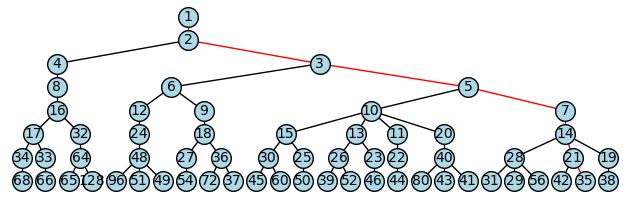

In [161]:
PrintTree(MakeTree(7), 35)

Построим дерево до 5-го уровня и выделим путь до вершины $n = 12$:

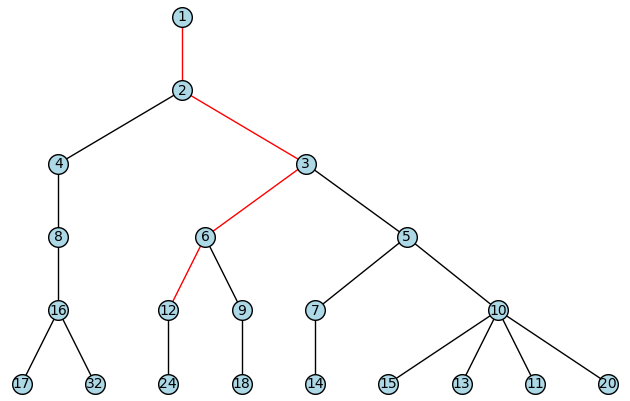

In [162]:
PrintTree(MakeTree(5), 12)

Получим цепочку вычисления $x^{35}$ с помощью дерева степеней:

In [163]:
GetPathToNode(BuildTree(7), 35)

[1, 2, 3, 5, 7, 14, 21, 35]

Так, получили цепочку $x, x^2, x^3, x^5, x^{7}, x^{14}, x^{21}, x^{35}$.

Сравним данный метод с методом $SX$. Напишем функцию, возвращающую количество умножений для бинарного метода $SX$:

In [164]:
def GetAmountOfOperationsSX(n):
    return floor(log(n, 2)) + bin(n)[2:].count('1') - 1

Чтобы провести сравнение между бинарным методом и методом дерева степеней, мы внесли изменения в функцию, которая строит дерево степеней. Мы добавили количество умножений в качестве счетчика и флаг, который прекращает цикл, если было найдено значение $n$.

In [165]:
def MakeTreeOper(node):
    counter = 0
    nodeFound = True
    tree = {1:[]}
    nodes = [1]
    while nodeFound:
        counter += 1
        next_nodes = []
        for parent in nodes:
            for elem in GetPathToNode(tree, parent):
                potent_child = parent + elem
                if potent_child == node:
                    nodeFound = False
                if not(potent_child in tree):
                    tree[potent_child] = [parent]
                    next_nodes.append(potent_child)
        nodes = next_nodes
    return counter

Утверждаем, что дерево степеней не проигрывает бинарному методу (проверим до $n = 1000$).

In [166]:
allGoodFlag = True
if all([GetAmountOfOperationsSX(n) >= MakeTreeOper(n) for n in range(2,1000)]): print("Утверждение корректно!")
else: print("Всё плохо!")

Утверждение корректно!


#### Вывод
Мы реализовали алгоритм "дерева степеней". С использованием $SageMath$ удалось отобразить дерево до уровня $k$ и выделить цветом путь от корня до заданного числа $n$. Сравнив данную реализацию с бинарным методом, мы пришли к выводу, что дерево степеней не проигрывает бинарному методу (то есть, дерево степеней эффективнее, чем бинарный метод справа налево).

### 6. Изменённое дерево степеней

Для улучшения определения дерева степеней мы внесли несколько небольших изменений. Теперь узлы, которые находятся ниже ветви $i$, располагаются в порядке убывания:<br>
$i+a_{k-1}, ..., i+a_{1},i+a_{0}$<br>
В результате получаем дерево убывающих степеней. Мы также модифицировали функцию для получения узлов, находящихся ниже $i$, чтобы

In [167]:
def MakeTree(k):
    tree = {1:[]}
    nodes = [1]
    for level in range(k):
        next_nodes = []
        for parent in nodes:
            for elem in GetPathToNode(tree, parent):
                potent_child = parent + elem
                if not(potent_child in tree):
                    tree[potent_child] = [parent]
                    next_nodes.append(potent_child)
        nodes = next_nodes
    return tree

def GetPathToNode(tree, node):
    chain = [node]
    while node != 1:
        node = tree[node][0]
        chain.append(node)
    return chain

Продемонстрируем работу программы. Построим дерево до 7-го уровня и выделим путь до вершины $n=35$:

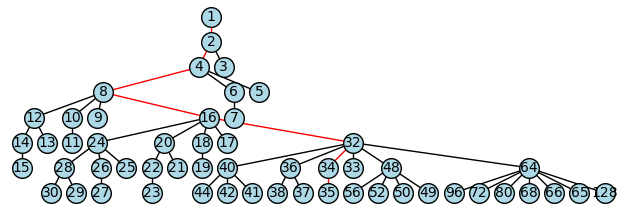

In [168]:
PrintTree(MakeTree(7), 35)

Построим дерево до 5-го уровня и выделим путь до вершины $n = 12$:

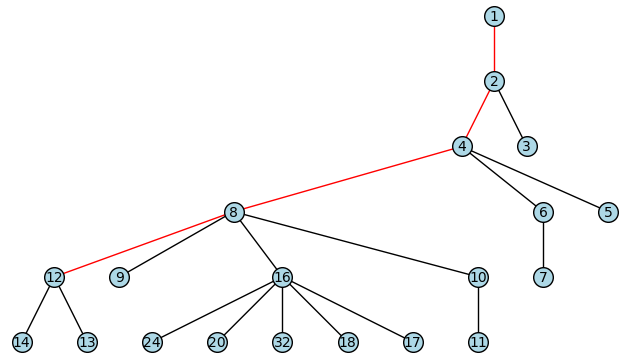

In [169]:
PrintTree(BuildTree(5), 12)

Покажем на практике, что изменённое дерево затрачивает столько же операций умножений, сколько и бинарный метод (проверим до $n = 1000)$:

In [170]:
if all(GetAmountOfOperationsSX(i) == MakeTreeOper(i) for i in range(2,1000)): 
       print('Утверждение корректно!')
else:
       print('Все плохо!')

Утверждение корректно!


## Выводы

Получены знания о том, как работают алгоритмы вычисления одночленов с минимальным количеством операций. Были освоены навыки использования программного пакета $SageMath$ для создания этих алгоритмов.<br>
Мы реализовали несколько алгоритмов, включая бинарный метод $SX$, бинарный метод возведения в степень справа налево, метод множителей и дерево степеней. Мы проверили работу алгоритмов и сравнили их с теоретическими предположениями.<br>
Было создано дерево убывающих степеней, и мы сравнили его с бинарным методом $SX$.